In [1]:
import os
import sys 
import typing as t
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix

# add src to path
sys.path.append('../..')
from utils.db_helper import get_image_data

In [2]:
SOURCE_DIR_V1 = "C:/database/StyleGanv1"
SOURCE_DIR_V2 = "C:/database/StyleGanv2"
SOURCE_DIR_FFHQ = "C:/database/FFHQ"

In [3]:
stylev1_datagen = get_image_data(SOURCE_DIR_V1, type='int')
stylev2_datagen = get_image_data(SOURCE_DIR_V2, type='int')
ffhq_datagen = get_image_data(SOURCE_DIR_FFHQ, type='int')

In [42]:
def comatrix_from_image(np_img: np.ndarray, distances: t.List[int], angles: t.List[float])-> np.ndarray:
    np_comatrix = np.empty(np_img.shape+(len(distances),len(angles)))
    if len(np_img.shape) == 3:
        for i in range(np_img.shape[-1]):
            np_comatrix[:,:,i] = greycomatrix(np_img[:,:,i], distances, angles)
    elif len(np_img.shape) == 2:
       np_comatrix = greycomatrix(np_img, distances, angles)
    else:
        raise ValueError('Bad shape of the image')
    return np_comatrix

In [46]:
def comatrix_from_dataset(src_path: str, distances: t.List[int], angles: t.List[float])-> np.ndarray:
    print("Loading dataset...")
    dataset_gen = get_image_data(src_path, type='int')
    print("Processing database...")
    np_comatrix_dataset = np.zeros(next(dataset_gen).shape+(len(distances),len(angles)), 
                                   dtype=np.float64)
    number_of_images = 0
    for np_image in dataset_gen:
        if number_of_images % 100 == 0:
            print(f"Image number: {number_of_images}")
        np_tmp_comatrix = comatrix_from_image(np_image, distances, angles)
        np_comatrix_dataset += np_tmp_comatrix
        number_of_images +=1
    return np_comatrix_dataset / number_of_images

In [47]:
# def display_comatrix(np_comatrix_dataset: np.ndarray):
np_comatrix_ffhq = comatrix_from_dataset(SOURCE_DIR_FFHQ, [1], [0])
np_comatrix_ffhq.shape

Loading dataset...
Processing database...
len: 3000
Image number: 0
Image number: 100


(256, 256, 3, 1, 1)

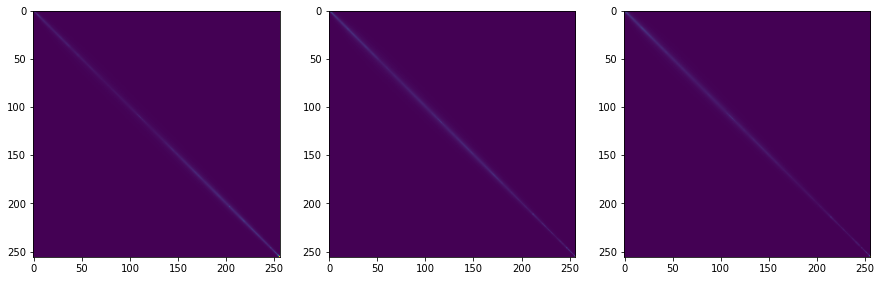

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
axs[0].imshow(np_comatrix_ffhq[:,:,0,0,0])
axs[1].imshow(np_comatrix_ffhq[:,:,1,0,0])
axs[2].imshow(np_comatrix_ffhq[:,:,2,0,0])